# PDF = Probability distribution function

In [2]:
import sys
sys.path.append('/home/kyungtak.lim/gbspy')
#from skimage.measure import label, regionprops

In [3]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py

import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
import matplotlib.colors as mcolors

from scipy.stats import skew, kurtosis

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

In [46]:
os.chdir('/zhisongqu_data/kyungtak/data_GBS/GBS_SN/nu_scan/SN_nu1')
s=g.Sim()

t_final = s.time[-1]
t_init = t_final - 10

dens = s.get_field('n', t1=t_init, t2=t_final)
#tempe = s.get_field('temperature', t1=t_init, t2=t_final)
#pe = dens * tempe
#tempi = s.get_field('temperaturi', t1=t_init, t2=t_final)
#strmf = s.get_field('strmf', t1=t_init, t2=t_final)
#omega = s.get_field('omega', t1=t_init, t2=t_final)
#vpari = s.get_field('vpari', t1=t_init, t2=t_final)
#vpare = s.get_field('vpari', t1=t_init, t2=t_final)

# Density
dens_avg  = np.mean(dens, axis=(2,3)); 
dens_std  = np.std(dens, axis=(2,3))
dens_avg_tor = np.mean(dens, axis=2)

# Normalized
dens_fluct   = np.sqrt((dens[:,:,0,:]-dens_avg_tor)**2) / dens_avg_tor
#dens_fluct = dens[:,:,0,-1] - dens_avg
dens_fluct_avg = np.mean(dens_fluct, axis=2)


#tempe_avg = np.mean(tempe, axis=(2,3))
#pe_avg    = np.mean(pe, axis=(2,3))
#tempi_avg = np.mean(tempi, axis=(2,3))
#strmf_avg = np.mean(strmf, axis=(2,3))
#omega_avg = np.mean(omega, axis=(2,3))
#vpari_avg = np.mean(vpari, axis=(2,3))
#vpare_avg = np.mean(vpare, axis=(2,3))


Xxpt = s.xxpt
Yxpt = s.yxpt
xmag = s.x0
ymag = s.y0
Psi = s.Psi
Bpol = s.dpsidx_v**2 + s.dpsidy_v**2
Xpt_coord = np.unravel_index(np.argmin(Bpol[Bpol > 0]), s.dpsidx_v.shape)

In [48]:
dens_fluct.shape

(324, 244, 101)

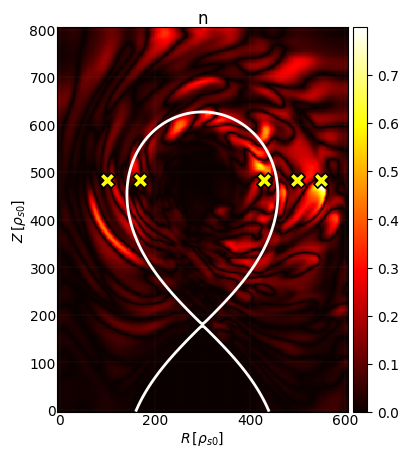

In [40]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(figsize=(4, 5), sharex=True, sharey=True)

cs1 = ax.pcolormesh(X, Y, dens_fluct_avg, cmap='hot')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)


ax.contour(X, Y, Psi, levels=[Psi[iyxpt, ixxpt]], colors='w', linewidths=2)
ax.grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
ax.grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', labelsize=10, pad=1)
ax.tick_params(axis='y', labelsize=10, pad=1)
ax.tick_params(which='minor', direction="in", size=0)
ax.tick_params(which='major', direction="in", size=0)

ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=10, labelpad=1)
ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=10, rotation=90, labelpad=1)

# Several points
ax.scatter(s.x0, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0-130, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0-200, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0-250, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0+130, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0+200, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)
ax.scatter(s.x0+250, s.y0, s=120, color='yellow', marker='X', edgecolor='k', linewidth=1.2)


ax.set_title(r'n', fontsize=12, pad=1.5)

#plt.gca().set_aspect('equal')
plt.show(block=False)

Grid indices for points (iy, ix):
  Point 1: R=168.8, Z=483.8 -> (iy=195, ix=69)
  Point 2: R=98.8, Z=483.8 -> (iy=195, ix=41)
  Point 3: R=428.8, Z=483.8 -> (iy=195, ix=173)
  Point 4: R=498.8, Z=483.8 -> (iy=195, ix=201)
  Point 5: R=548.8, Z=483.8 -> (iy=195, ix=221)


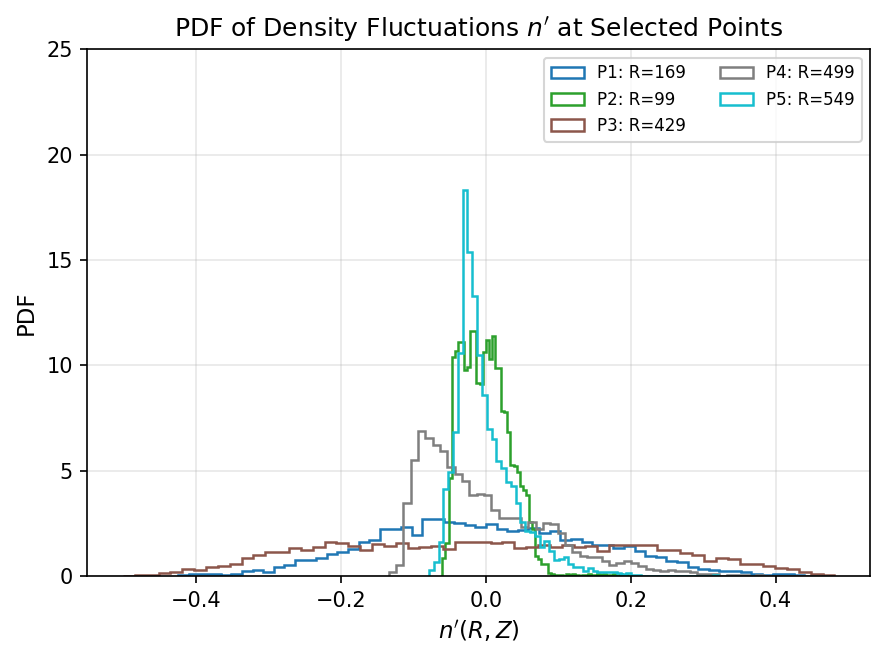


Skewness and excess kurtosis at each point:
Point 1: R=168.8, Z=483.8  ->  skewness=0.139,  kurtosis=-0.368
Point 2: R=98.8, Z=483.8  ->  skewness=0.760,  kurtosis=1.386
Point 3: R=428.8, Z=483.8  ->  skewness=0.031,  kurtosis=-0.925
Point 4: R=498.8, Z=483.8  ->  skewness=1.172,  kurtosis=1.379
Point 5: R=548.8, Z=483.8  ->  skewness=1.597,  kurtosis=3.845


In [53]:
# ----------------------------------------------------
# 0) Assume you already have:
#     dens        : (ny, nx, nphi, nt)
#     dens_fluct_avg : (ny, nx)  # used for 2D plot
#     s.x, s.y, s.x0, s.y0
# ----------------------------------------------------

ny, nx, nphi, nt = dens.shape

# Fluctuation field: n' = n - <n>_{phi,t}
# dens_avg was computed as np.mean(dens, axis=(2, 3))
dens_fluc = dens - dens_avg[:, :, None, None]   # shape (ny, nx, nphi, nt)

# ----------------------------------------------------
# 1) Define the 7 scatter points in (R,Z)
#    (same as in your scatter calls)
# ----------------------------------------------------
R_points = np.array([
    s.x0 - 130,
    s.x0 - 200,
    s.x0 + 130,
    s.x0 + 200,
    s.x0 + 250,
], dtype=float)

Z_points = np.full_like(R_points, s.y0, dtype=float)

# ----------------------------------------------------
# 2) Find nearest grid indices for each point
# ----------------------------------------------------
ix_list = [np.argmin(np.abs(s.x - R)) for R in R_points]
iy_list = [np.argmin(np.abs(s.y - Z)) for Z in Z_points]

print("Grid indices for points (iy, ix):")
for k, (iy, ix) in enumerate(zip(iy_list, ix_list)):
    print(f"  Point {k+1}: R={R_points[k]:.1f}, Z={Z_points[k]:.1f} -> (iy={iy}, ix={ix})")

# ----------------------------------------------------
# 3) Build PDFs for each point
# ----------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4.5), dpi=150)

colors = plt.cm.tab10(np.linspace(0, 1, len(ix_list)))  # 7 distinct colors

stats = []  # to store skewness, kurtosis

for k, (iy, ix, col) in enumerate(zip(iy_list, ix_list, colors)):
    # Gather all fluctuation samples at this (R,Z) over (phi, t)
    data = dens_fluc[iy, ix, :, :].ravel()   # shape (nphi*nt,)

    # Histogram / PDF
    ax.hist(
        data,
        bins=60,
        density=True,
        histtype='step',
        linewidth=1.2,
        color=col,
        label=fr'P{k+1}: R={R_points[k]:.0f}'
    )

    # Skewness and kurtosis
    sk = skew(data, bias=False)
    ku = kurtosis(data, fisher=True, bias=False)  # excess kurtosis
    stats.append((sk, ku))

ax.set_xlabel(r"$n'(R,Z)$", fontsize=11)
ax.set_ylabel("PDF", fontsize=11)
ax.set_title(r"PDF of Density Fluctuations $n'$ at Selected Points", fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=8, ncol=2)

#ax.set_xlim(-0.1, 0.1)
ax.set_ylim(0, 25)

plt.tight_layout()
plt.show()

# ----------------------------------------------------
# 4) Print skewness & kurtosis for each point
# ----------------------------------------------------
print("\nSkewness and excess kurtosis at each point:")
for k, (R, Z, (sk, ku)) in enumerate(zip(R_points, Z_points, stats), start=1):
    print(f"Point {k}: R={R:.1f}, Z={Z:.1f}  ->  skewness={sk:.3f},  kurtosis={ku:.3f}")
